# Task 3 : Car Price Prediction

#### Import Libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics

#### Import dataset

In [62]:
data='car data.csv'
df=pd.read_csv(data)

In [63]:
import warnings 
warnings.filterwarnings('ignore')

In [64]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [65]:
df.shape

(301, 9)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [67]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

#### Data Visualization

<Axes: >

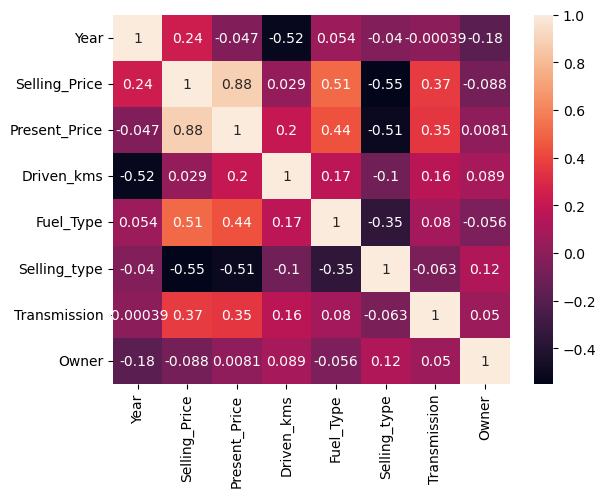

In [86]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# plot heatmap
sns.heatmap(df[numerical_cols].corr(), annot=True)

In [68]:
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [69]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

df.replace({'Transmission':{'Manual':0,'Automatic':1,'Name':2}},inplace=True)

In [70]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [79]:
x=df.drop(['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']

In [72]:
print(x)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

print(y)

#### Regression

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1,random_state=2)

In [75]:
lin_reg_model = LinearRegression()

In [76]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [77]:
training_data_predictaion = lin_reg_model.predict(x_train)

In [80]:
#R squared error
error_score = metrics.r2_score(y_train, training_data_predictaion)
print("R Squared error: ",error_score)

R Squared error:  0.8796483009370207


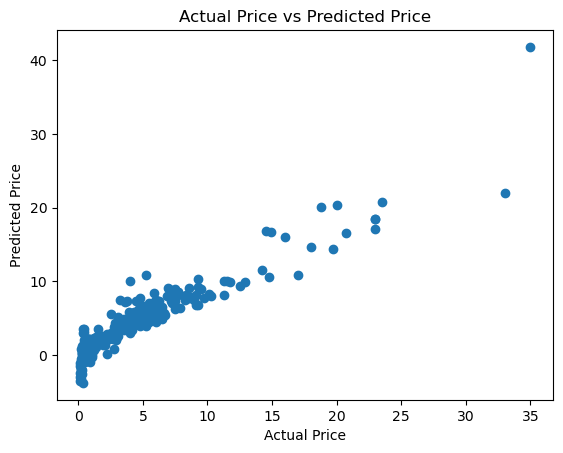

In [40]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [42]:
test_data_prediction = lin_reg_model.predict(x_test)

error_score = metrics.r2_score(y_test, test_data_prediction)
print("R Squared error: ",error_score)

R Squared error:  0.8365861023212434


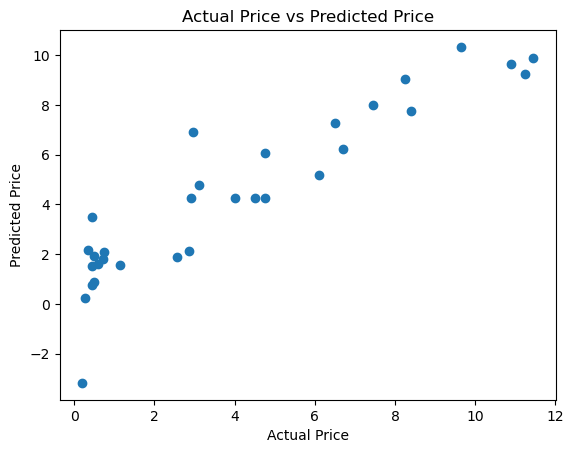

In [43]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [44]:
lass_reg_model = Lasso()

In [45]:
lass_reg_model.fit(x_train, y_train)

Lasso()

In [48]:
training_data_predictaion = lass_reg_model.predict(x_train)

In [81]:
#R squared error
error_score = metrics.r2_score(y_train, training_data_predictaion)
print("R Squared error: ", error_score)

R Squared error:  0.8796483009370207


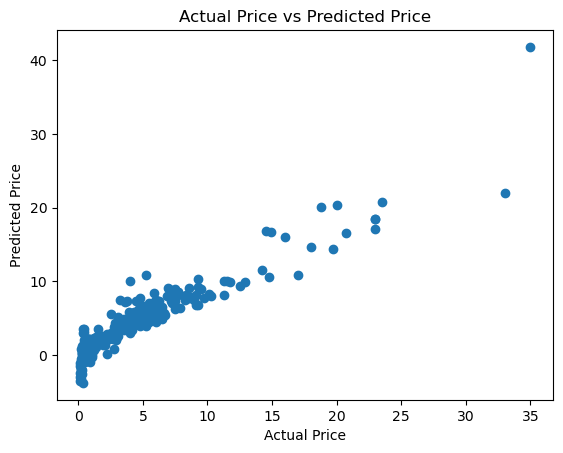

In [83]:
plt.scatter(y_train, training_data_predictaion)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [84]:
test_data_prediction = lin_reg_model.predict(x_test)

error_score = metrics.r2_score(y_test, test_data_prediction)
print("R Squared error: ",error_score)

R Squared error:  0.8365861023212434


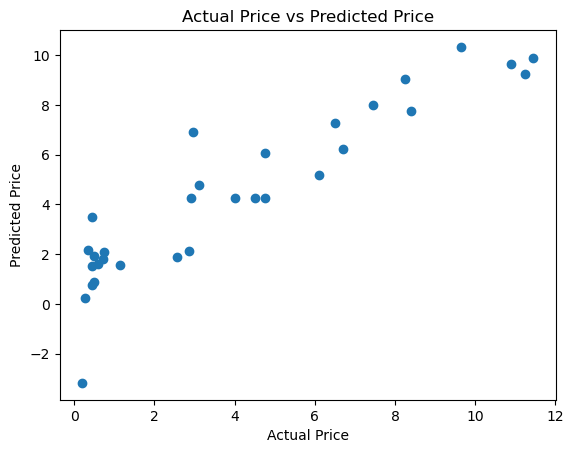

In [85]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

#### Histogram

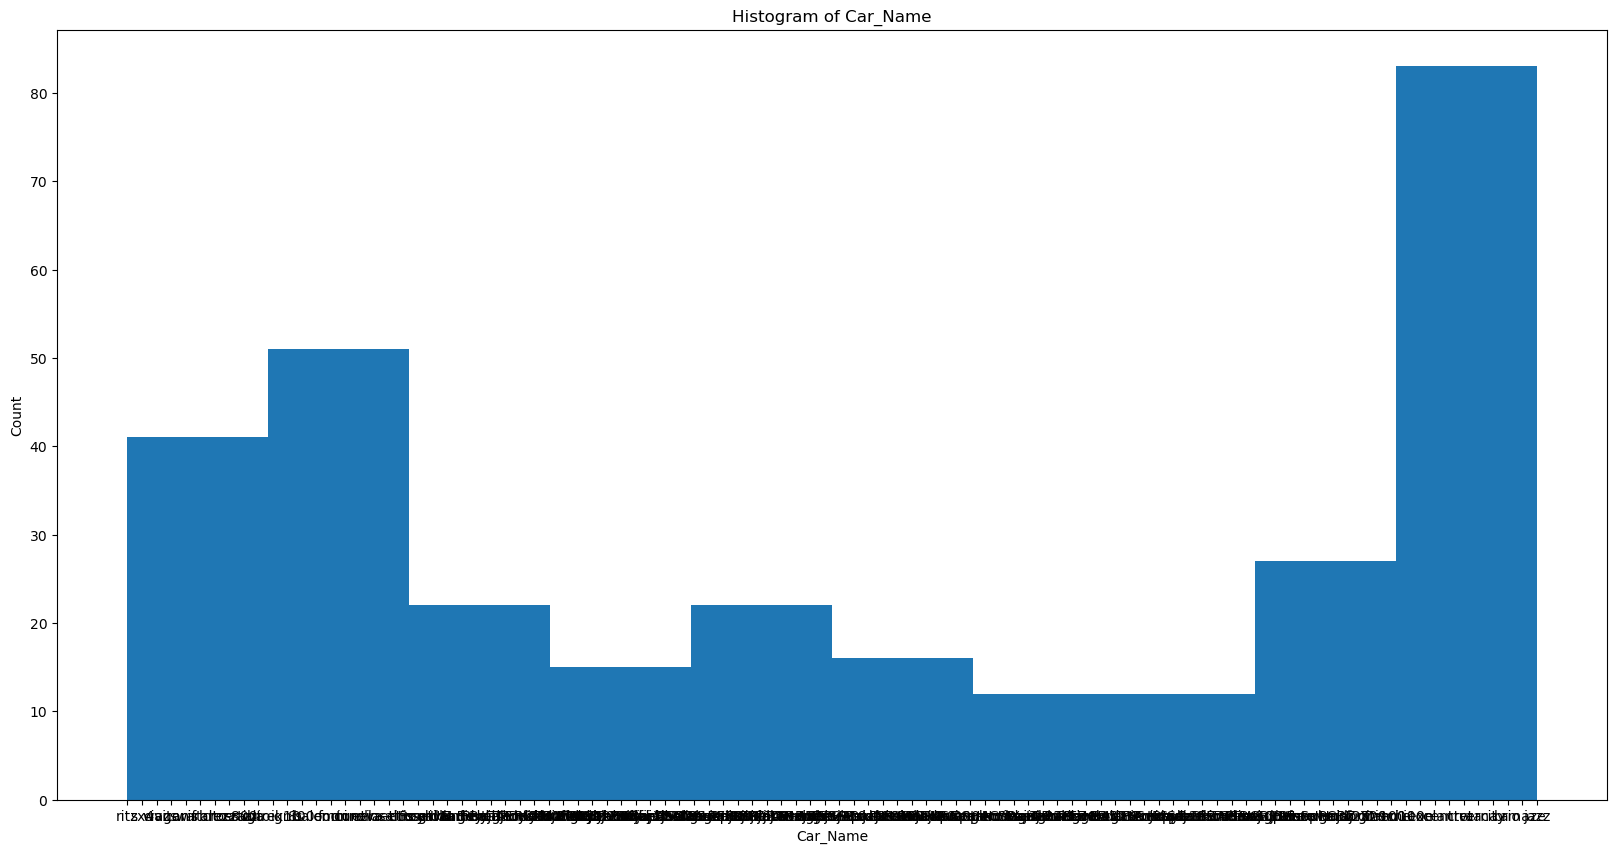

In [89]:
# plot histogram of each categorical column using matplotlib
import pandas as pd
import matplotlib.pyplot as plt

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(20, 10))
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Histogram of {col}')
    plt.show()